# FCA Take-home assignment

Name: German  
Surnames: Martinez-Ayuso

## Loading environmment

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
colors_ = sns.color_palette("Paired")
sns.set_palette(colors_)


### Reading file

In [2]:
df = pd.read_csv('data set.csv', sep=';')

print(df.shape)


(41188, 1)


In [3]:
# Checking the dataframe
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


It seems there is a problem in the text file. Let's read the first lines

In [4]:
def print_lines(file_name,n):
    i=0 
    with open(file_name) as file: 
        for i in range(n):
            line = file.readline()
            print(line)    

print_lines('data set.csv',5)

"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""

"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";""no"";""telephone"";""may"";""mon"";261;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"57;""services"";""married"";""high.school"";""unknown"";""no"";""no"";""telephone"";""may"";""mon"";149;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"37;""services"";""married"";""high.school"";""no"";""yes"";""no"";""telephone"";""may"";""mon"";226;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no"";""telephone"";""may"";""mon"";151;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""



It seems there are many quotes ("") especially at the end of each line where we have 3 quotes whereas at the beginning we only have one. 
This might have confused pandas during the reading. 

I'm going to remove them, since CSV format do not need quotes. In fact, removing the quotes will help to pandas to read the data in an appropriate data type. Otherwise, all the data in the columns will be formatted as strings (str) because of the quotes.

We can also use 'find and replace' from a decent text editor such as Sublime Text to replace the "" by nothing. However, for the purpose of this notebook, I would like to keep everything logged. 

In [5]:
# Read the text into a string and perform the replacing. 
with open('data set.csv') as f:
    newText=f.read().replace('"', '') 

# Writing the output to another file.
with open('data set_fixed.csv', "w") as f:
    f.write(newText)

# Printing again
print_lines('data set_fixed.csv', 5)

age;job;marital;education;default;housing;loan;contact;month;day_of_week;duration;campaign;pdays;previous;poutcome;emp.var.rate;cons.price.idx;cons.conf.idx;euribor3m;nr.employed;y

56;housemaid;married;basic.4y;no;no;no;telephone;may;mon;261;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

57;services;married;high.school;unknown;no;no;telephone;may;mon;149;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

37;services;married;high.school;no;yes;no;telephone;may;mon;226;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

40;admin.;married;basic.6y;no;no;no;telephone;may;mon;151;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no



In [6]:
df = pd.read_csv('data set_fixed.csv',sep=';')

print(df.shape)
df.sample()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6804,43,entrepreneur,married,university.degree,no,no,yes,telephone,may,wed,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's see the variables names (columns header).

In [7]:
pprint(df.columns.to_list())

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']


The variable 'y' is the output of the call and express if the potential client subscribed the product or no. 
I am going to change the name of that variable to something more representative such 'subscribed'. 


In [8]:
columns_names = df.columns.to_list()
columns_names[-1] = 'subscribed'
df.columns = columns_names

pprint(df.columns.to_list())

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'subscribed']



## Exploratory Data Analysis


Let's have a look at the data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

As we can see, the data is split in three types: object (string), int and float. 

### Missing data

It seems there is no null-data (N/A). 
However this type of data (non valid or missing) is represented in this case as `999` as it is explained in the dataset description. 

In [10]:
df[df==999].count()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed            0
dtype: int64

The values of pdays are almost missing.


In [11]:
num_non_suplied_pdays = df['pdays'][df['pdays']==999].count()

print('The percentage of missing data is: {:.2f}%'.format(100*num_non_suplied_pdays/len(df)))

The percentage of missing data is: 96.32%


The data of this column then is not relevant since it is lost for almost all the samples.

Therefore I will delete it.


In [12]:
del df['pdays']

In `duration` there is only two rows that has non-valid values (`999`).
We should check what the values in `duration` look like in order to decide if they are valid values or not. 

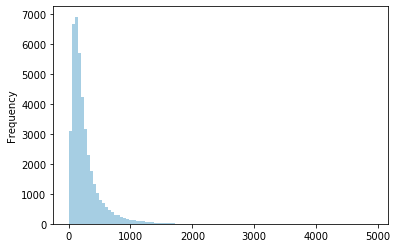

In [13]:
df.duration.plot.hist(bins=100);

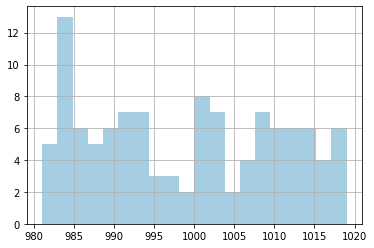

In [14]:
df.query('980 < duration < 1020').duration.hist(bins=20);

The values are reasonable hence I will not remove the correspondent samples. 

### Duplicated values
Let's check for duplicated values.


In [15]:
prev_ = df.shape[0]
df.drop_duplicates(inplace=True)

print("Number of rows deleted: {}".format(prev_ - df.shape[0]))

Number of rows deleted: 12


### Misleading data

Let's check also if there are any conflicting rows. For example, all the variables are the same but the subscription is different.


In [16]:
prev_ = df.shape[0]
df.drop_duplicates(subset=df.columns[:-1], keep=False, inplace=True)

print("Number of rows deleted: {}".format(prev_ - df.shape[0]))


Number of rows deleted: 0


This is a good sign.

### Data types

Let's check what type of values do we have. 

In [17]:
# Let's examine the unique values
for col in df:
    print(col.title(),'  ',df[col].dtype)
    if df[col].dtype not in (np.int64,np.float64):
        pprint(df[col].unique().tolist())
    print('\n')

Age    int64


Job    object
['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']


Marital    object
['married', 'single', 'divorced', 'unknown']


Education    object
['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']


Default    object
['no', 'unknown', 'yes']


Housing    object
['no', 'yes', 'unknown']


Loan    object
['no', 'yes', 'unknown']


Contact    object
['telephone', 'cellular']


Month    object
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']


Day_Of_Week    object
['mon', 'tue', 'wed', 'thu', 'fri']


Duration    int64


Campaign    int64


Previous    int64


Poutcome    object
['nonexistent', 'failure', 'success']


Emp.Var.Rate    float64


Cons.Price.Idx    float64


Cons.Conf.Idx    float64


Euribor3M    float64


Nr.Employed    float64


Subscribe

### Outlier filtering

There are several extreme values in out data, as for example some people over 90. 

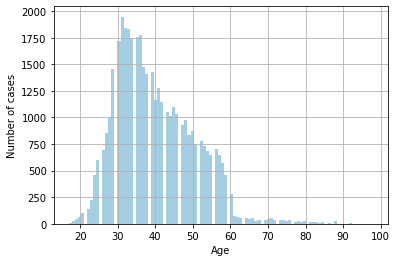

In [18]:
ax = df['age'].hist(bins=100);
ax.set_xlabel('Age');
ax.set_ylabel('Number of cases');

These samples (which very extreme values) are considered outliers. And many times it is recommendable to remove them. 
We will remove all of them at the same time. 
A common approach is to cut-off the samples which exceed a certain percentile or quartile. I believe with the percentile 98 and 2 should be probably enough to filter the extreme values. Using quartiles might be too restrictive. 


In [19]:
Q02 = df.quantile(0.02)
Q98 = df.quantile(0.98)

pprint(Q02.to_string())
print('\n')
pprint(Q98.to_string())

df = df[~((df < Q02) |(df > Q98)).any(axis=1)]

print('\n')
print(df.shape)

('age                 24.000\n'
 'duration            17.000\n'
 'campaign             1.000\n'
 'previous             0.000\n'
 'emp.var.rate        -3.400\n'
 'cons.price.idx      92.379\n'
 'cons.conf.idx      -47.100\n'
 'euribor3m            0.714\n'
 'nr.employed       4991.600')


('age                 62.000\n'
 'duration          1052.500\n'
 'campaign            11.000\n'
 'previous             2.000\n'
 'emp.var.rate         1.400\n'
 'cons.price.idx      94.465\n'
 'cons.conf.idx      -30.100\n'
 'euribor3m            4.968\n'
 'nr.employed       5228.100')


(34944, 20)


### 'Unknown' filtering

There are some categorical variables which has an `unknown` group. 
We normally can't extract any information from these groups, therefore these subgroups are normally misleading. 
One approach is either use predictive models to presume these values, or remove them. 

I will opt for the later, we will remove any group labeled as `unknown` in any category.

In [20]:
pprint((100*(df=='unknown').sum()/len(df)).to_string().replace('\n',' % \n'))

('age                0.000000 % \n'
 'job                0.758356 % \n'
 'marital            0.180288 % \n'
 'education          3.806090 % \n'
 'default           22.759272 % \n'
 'housing            2.406708 % \n'
 'loan               2.406708 % \n'
 'contact            0.000000 % \n'
 'month              0.000000 % \n'
 'day_of_week        0.000000 % \n'
 'duration           0.000000 % \n'
 'campaign           0.000000 % \n'
 'previous           0.000000 % \n'
 'poutcome           0.000000 % \n'
 'emp.var.rate       0.000000 % \n'
 'cons.price.idx     0.000000 % \n'
 'cons.conf.idx      0.000000 % \n'
 'euribor3m          0.000000 % \n'
 'nr.employed        0.000000 % \n'
 'subscribed         0.000000')


C:\ProgramData\Miniconda3\envs\invest\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


As we see there are many unknown in `default`. Let's have a look more close to this field. 

In [21]:
def inspect_cat_var(df, var):

    plt.figure(figsize=(12,4))
    ax = sns.countplot(data=df, x=var,hue='subscribed')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.legend(labels=['No','Yes'])
    ax.set_xlabel(var.title())
    ax.set_ylabel('Number of cases')

    plt.tight_layout()

    labels = df[var].unique().tolist()
    labels.extend(labels)

    for i, p in enumerate(ax.patches):
        tot_ = df[df[var]==labels[i]][var].count() 
        ax.annotate('{:.1f} %'.format(100*p.get_height()/tot_), (p.get_x()+0.05, p.get_height()+8)) 


    # To write the number of examples of each value of the variable. 
    new_ = []
    for i,each_lab in enumerate(ax.xaxis.get_ticklabels()):
        tot_ = df[df[var]==df[var].unique()[i]][var].count()

        prev_ = each_lab.get_text()
        new_.append(prev_ + '\n' + '({})'.format(tot_)) 

    ax.set_xticklabels(new_) # Setting new labels
    plt.show()


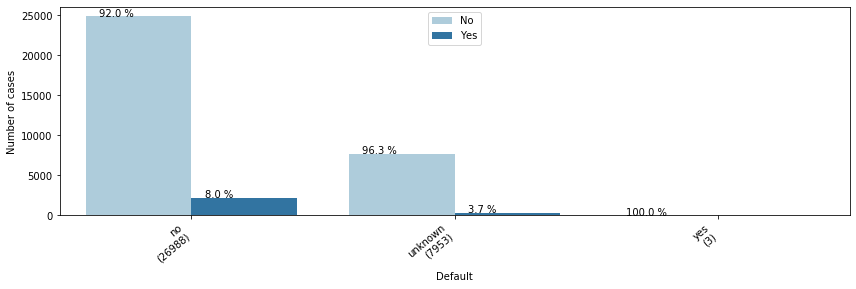

In [22]:
inspect_cat_var(df,'default')


The `default` variable is mainly composed of 'No' and 'unknown'. Therefore I believe we cannot extract that many conclusions from this, so I will delete it. 

In [23]:
del df['default']

The next category with many `unknown` variables is education. 

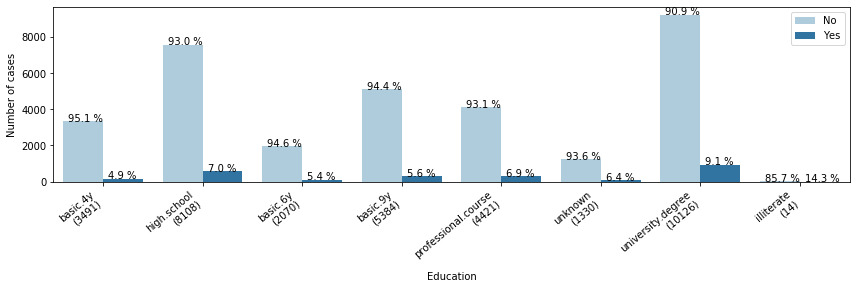

In [24]:
inspect_cat_var(df,'education')

The number of samples with `unknown` is not small, around 1330. 

I think it is obvious not much information can be extracted from this category, however, in some cases, this data could be use. 
For example if we want to analyze the data with respect to one category, let's say `university.degree` vs `non_university.degree`. However in that case we have to assume that `unknown` gathers all the education levels not present in graph. 

In this case, it seems not very reasonable that exist any other relevant education level apart of {{df['education'].unique().tolist()}}, hence this data is probably missing in the sense the person did not reply to that question. 

So I believe the best will be to remove the samples with `education` marked as `unknown`. This approach is based on "**quality over quantity**". 

In [25]:
df.drop(axis=0,index=df[df['education']=='unknown'].index, inplace=True)

df.shape

(33614, 19)

Let's analyze now the `housing` variable.

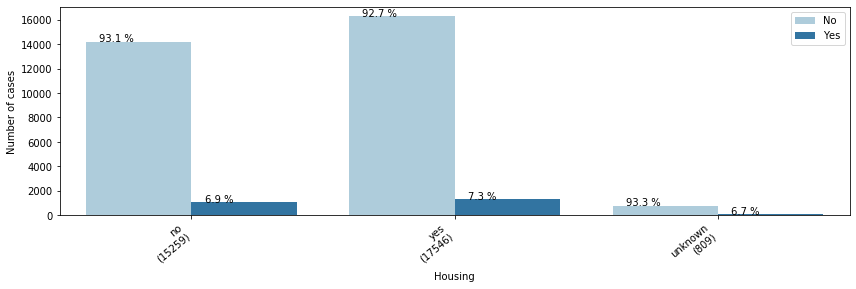

In [26]:
inspect_cat_var(df,'housing')

Again, let's remove the `unknown` variables. 

In [27]:
df.drop(axis=0,index=df[df['housing']=='unknown'].index, inplace=True)

df.shape

(32805, 19)

Now let's see `loan`.

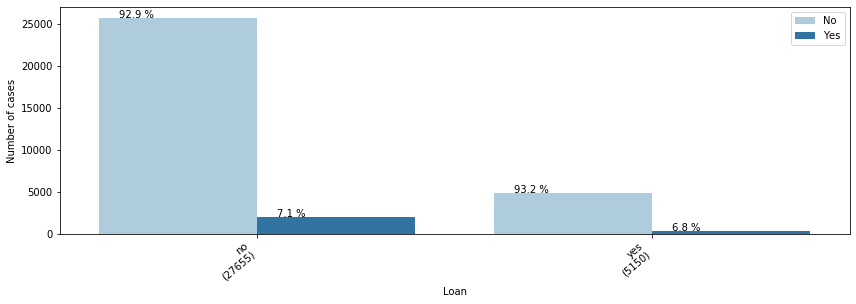

In [28]:
inspect_cat_var(df,'loan')

It seems we already deleted the `unknown` probaly they were linked to the `unknown`'s in housing. 

Let's analyse now the `job`category.

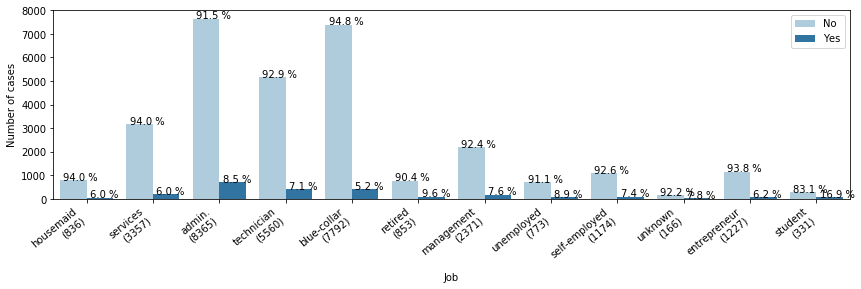

In [29]:
inspect_cat_var(df,'job')

Only 166 samples are `unknown`, hence it is safe to remove them. 

In [30]:
df.drop(axis=0,index=df[df['job']=='unknown'].index, inplace=True)

df.shape

(32639, 19)

Same with the `marital` variable:

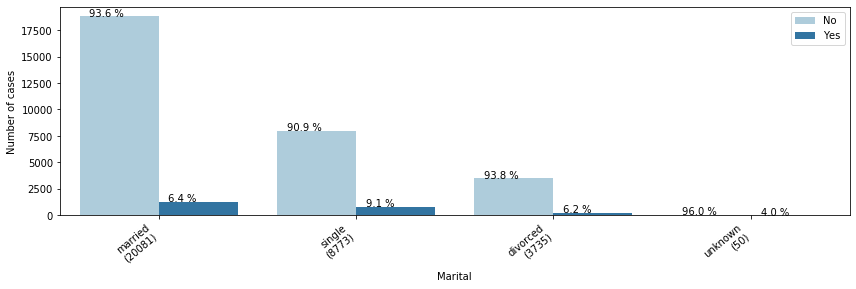

In [31]:
inspect_cat_var(df,'marital')

In [32]:
df.drop(axis=0, index=df[df['marital']=='unknown'].index, inplace=True)
df.shape

(32589, 19)

Let's check there is no unknown values in any sample or variable.

In [33]:
pprint(df[df=='unknown'].sum())

print('\n')
print(df.shape)

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
subscribed        0.0
dtype: float64


(32589, 19)


### Subscription variable

The data in the `subscribed` variable is a string, it is more efficient to convert it to a numerical int. 

In [34]:
# Replacing by int.
df['subscribed'] = [1 if x=='yes' else 0 for x in df.subscribed]


### Numerical variables


Let's plot also some relationships of the numerical variables. 

We need to filter them first.

In [35]:
# So let's filter the columns to the numerical ones. 
vars_ = [each_column for each_column in df.columns.to_list() if df[each_column].dtype in (np.int64, np.float64)]

print(vars_)

['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']


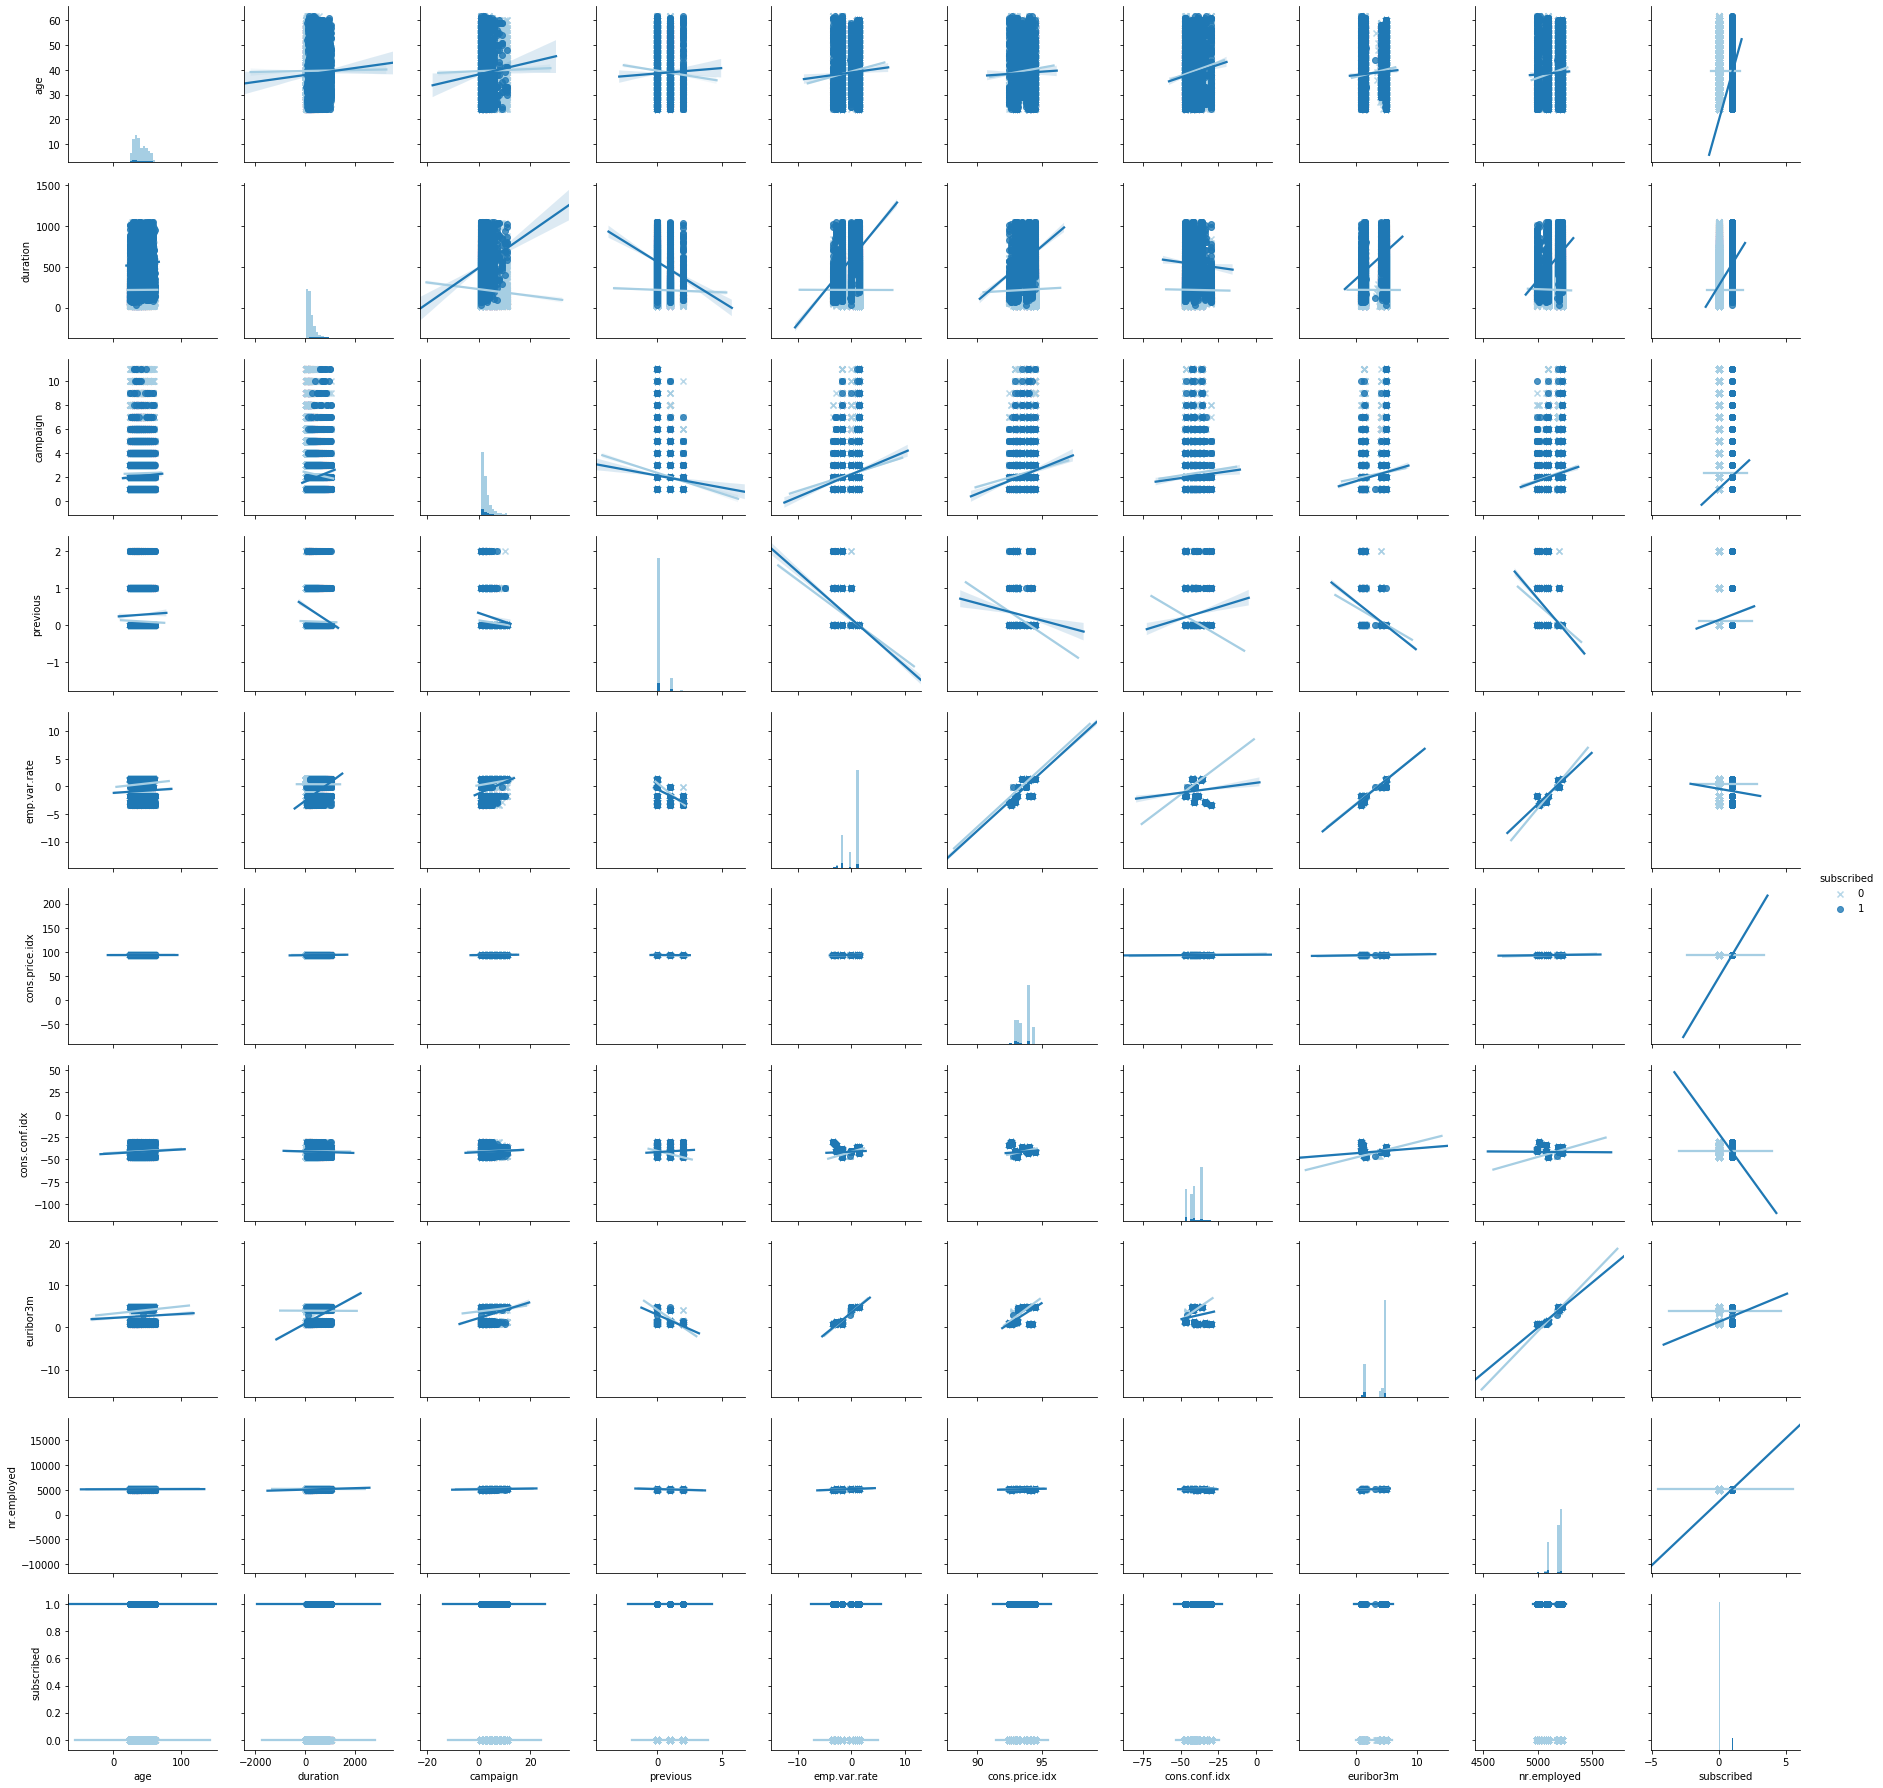

In [36]:
# Plotting
pair_grid = sns.pairplot(df,
                         diag_kind='hist',
                         hue='subscribed',       # to plot the points with the marker depending on the subscribed or not 
                         hue_order=[0,1], 
                         markers=["x","o"],
                         vars=vars_  ,
                         kind='reg'
                        )

The command sns.pairplot() do "By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column." (from Seaborn documentation) 

From that plot we can see some notes:

- the graph campaign vs age shows that there is a low rate of subscription when the campaign contacts exceed 15. The most of the subscriptions correspond with less than 8 contacts.


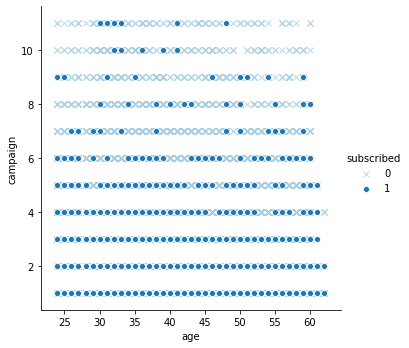

In [37]:
pair_grid = sns.pairplot(df,
                         hue='subscribed', # to plot the points with the marker depending on the subscribed or not 
                         markers=["x","o"],
                         hue_order=[0,1], 
                         x_vars='age',
                         y_vars='campaign',
                         height = 5
                        )

- when the duration of the phone call is low, most of the calls ends in no subscriptions. That would make sense since if the person is not interested in the product, he won't keep the call for long. 
However the most frequent duration for both (subscribed and not subscribed) is relatively close.

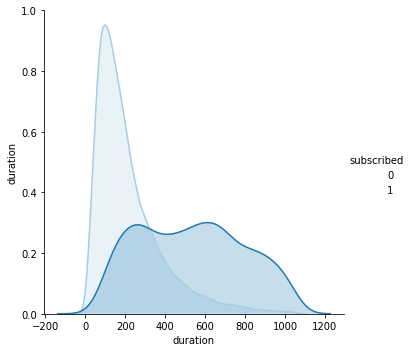

In [38]:
pairplot = sns.pairplot(df,
                         hue='subscribed', 
                         x_vars='duration',
                         y_vars='duration',
                         height = 5,
                        ) 

Let's analyze each one of the variables.

#### 'Age'

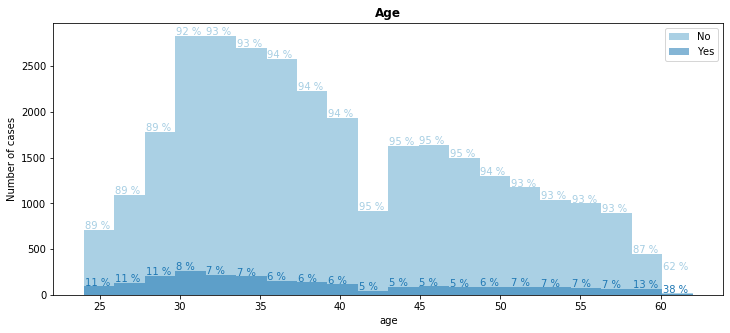

In [39]:
def inspect_num_var(df,name_column,bins=20,percentage=True): 
    fig, ax = plt.subplots(1, figsize = (12,5))
    
    unique_ = len(df[name_column].unique())
    if unique_ < 20 and bins==20:
        bins= unique_
#     print('The number of bins is {}'.format(bins))
    
    # Adding non-subscribed bars
    d_non, _ , patches_non = ax.hist(df[df['subscribed']==0][name_column], bins, alpha = 0.95, label='No',color=colors_[0])
    
    # Adding subscribed bars
    d_yes, _ , patches_yes = ax.hist(df[df['subscribed']==1][name_column], bins, alpha = 0.55, label='Yes',color=colors_[1])
    
    format_ = '{:.0f}'
    if percentage:
        tot= d_non + d_yes
        d_non = 100*d_non/tot
        d_yes = 100*d_yes/tot
        format_ = '{:.0f} %'
        
    # To add the numbers at the bars. 
    for i, (each_patch_non,each_patch_yes) in enumerate(zip(patches_non,patches_yes)): 
        #To avoid overlapping the numbers when the bars are close to each other. 
        if (each_patch_non.get_height() < 250) \
        or (each_patch_non.get_height()-60 < each_patch_yes.get_height() <each_patch_non.get_height()+60) \
        or (each_patch_yes.get_height()-60 < each_patch_non.get_height() <each_patch_yes.get_height()+60):
            
            heigh_ = each_patch_non.get_height() + 250
        else:
            heigh_ = each_patch_non.get_height() + 12      
        
        # numberfor the subscribed cases
        if d_non[i]>0:
            ax.annotate(format_.format(d_non[i]), 
                    (each_patch_yes.get_x()+0.05, heigh_),
                    color=colors_[0])
        
        # numberfor the subscribed cases
        if d_yes[i]>0:
            ax.annotate(format_.format(d_yes[i]), (each_patch_yes.get_x()+0.05, each_patch_yes.get_height()+8),color=colors_[1])
    
            
    # Some decoration
    ax.set_title(name_column.title(), fontweight="bold")
    ax.set_ylabel("Number of cases")
    ax.set_xlabel(name_column) 
    ax.legend()
    
    return fig, ax, (d_yes,d_non), (patches_yes, patches_non)

    
inspect_num_var(df,'age');


It is quite interesting to see a big drop of samples around the ages 42-43. It might indicate the sampling is a bit biased. 
Normally the sampling should be representative of the population we want to study. People around 42-43 years old are not that different from people 40 or 45 year old. Therefore I don't find an explanation to reduce on purpose the number of samples at that range (42-43). I would think the sampling of the population has not being performed correctly. 

It is also interesting that the ratio of subscription is quite similar in the range of ages 30 to 57, being around 5-8%.
Younger people shows a higher rate of subscription, around 11%. 
Older people (>60) shows also higher rate of subscription, but the amount of data is not much (less than 700 samples) so we should be careful when extracting conclusions of this range of ages. 

#### 'Duration'

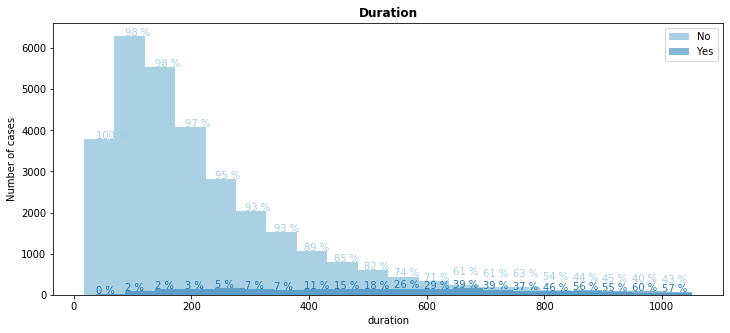

In [40]:
inspect_num_var(df,'duration');

The 'duration' is a variable which can't be used for prediction. Since it is an **outcome** after the contact. You already know if the client has subscribed the product by the end of the call. 

Then **this parameter should not be used in the model predictions**.

In [41]:
df.drop(axis=1,labels='duration', inplace=True)
print(df.shape)

(32589, 18)


#### 'Campaign'

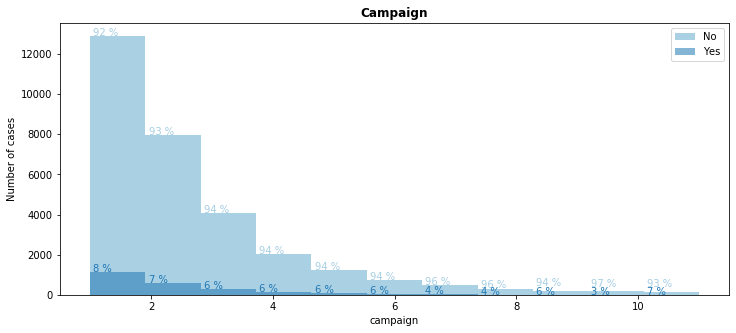

In [42]:
inspect_num_var(df,'campaign',bins=11);

Again here the rate of subscription is around 4-8%. The amount of samples decrease quite a lot with respect to the number of campaigns. 

This distribution makes me think this variable is not going to be very important, since the ratio of subscription is more or less fixed for each number of campaigns. We could delete it if we want or do a comparative study of the performance of the algorithm for each of the cases (with and without `campaign` variable).

#### 'Pdays'
Since we already eliminated the column 'pdays' because it has many data missing.


#### 'Previous'

Let's go for 'previous'.

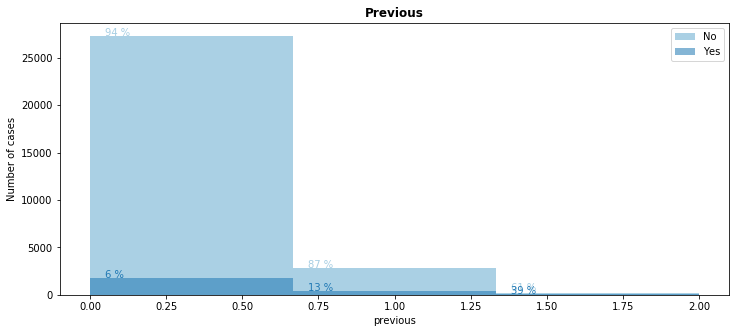

In [43]:
inspect_num_var(df,'previous', bins=3, percentage=True);

It is significative that with high number of contacts there is a high number of subscriptions.


#### 'emp.var.rate'


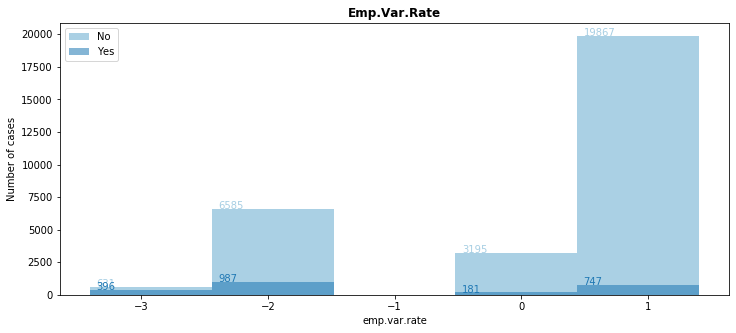

In [44]:
inspect_num_var(df,'emp.var.rate', bins=5, percentage=False);

This is quite interesting, at low employment (-3) the percentage of subscription is higher thant when the employment is positive.
However, both numbers (subscriptions at -3 (396) and at 1 (747)) are at the same order of magnitude, which might means there is a minimum number of subscriptions no matter what is the employment rate. This makes sense in the sense that it is a long term product and the employment rate tend to change over time, so people might try to look at the long term regardless the employment situation. 

#### 'cons.price.idx'

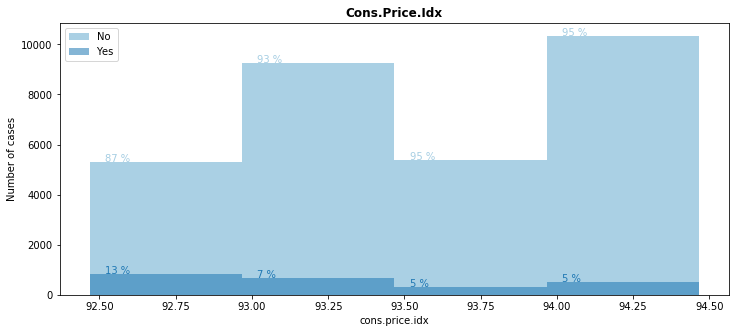

In [45]:
inspect_num_var(df, 'cons.price.idx', bins=4);

It seems that lower consumer price index boost the number of subscriptions (lower consumer price -> higher number of subscriptions). 

#### 'cons.conf.idx'


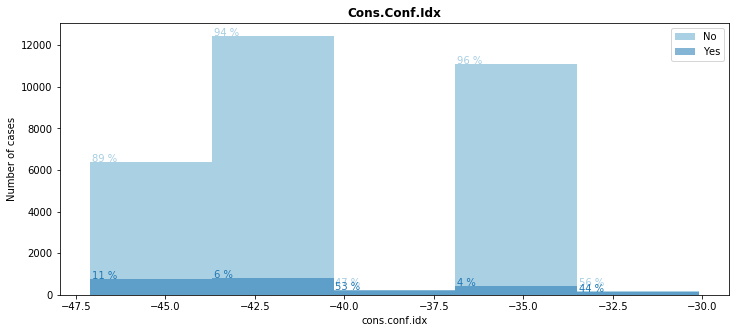

In [46]:
inspect_num_var(df, 'cons.conf.idx',bins=5, percentage=True);

It is interesting to see such big spikes of number of subscriptions in -47, -42, -43 and -36. These peaks present low rate of subscriptions. 



#### 'euribor3.m'


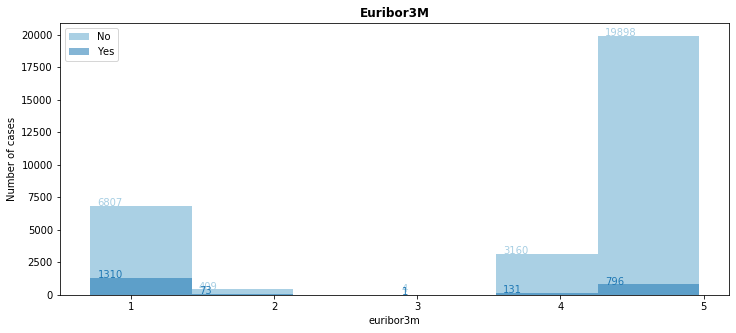

In [47]:
fig,ax,(d_yes,d_non),(patch_yes, patch_non) = inspect_num_var(df,'euribor3m', bins = 6, percentage=False);

Most of the data is around 5% which is where the euribor has been during the end of 2008 (https://www.euribor-rates.eu/en/euribor-rates-by-year/2008/), then it dropped to around 1% due to the financial crisis. 

I don't see any value very far from normal. 

#### 'nr.employed'

C:\ProgramData\Miniconda3\envs\invest\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Miniconda3\envs\invest\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


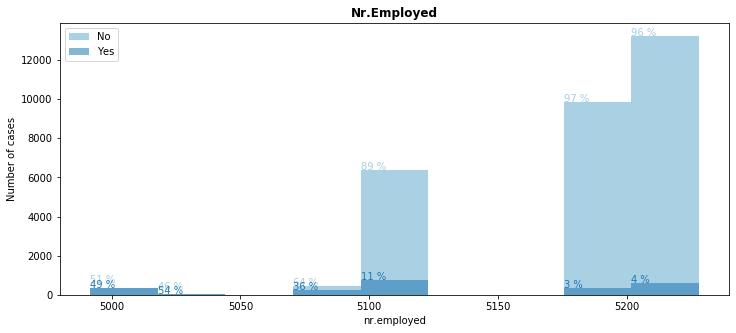

In [48]:
inspect_num_var(df,'nr.employed');

This variable represents the number of jobs created. This is another measurement of confident in the economical situation. 
And it is interesting how the higher this value gets:

- The higher number of data points we have. Maybe we just have higher number of records.
- The subscription rate falls. Around 5000 is much higher than around 5300. 

The later makes me believe that the consumers appreciate the product as a safety product which is good to have when the employment rate is not performing so well. 

#### Correlation analysis

Let's have a look to the correlation between variables. 

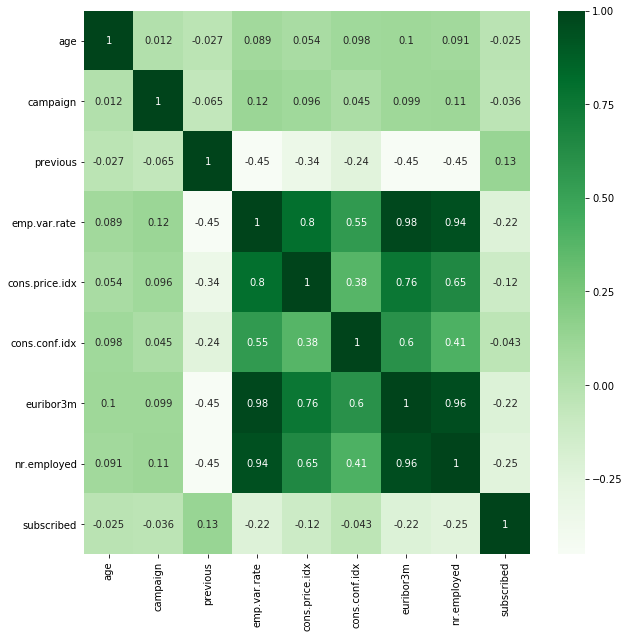

In [49]:
corr = df.corr()

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, cmap='Greens', annot = True);
fig.savefig('corr.png')


The correlation plot shows that the 'social and economic context variables' are quite related between each other. 


**Note**: It should be noticed that the Pearson coefficient assumes linearity between the variables, so in case of highly non-linear behaviours this coefficient might be misleading. 

Let's see which columns are the best correlated to the subscribed variable.

A reasonable threshold for Pearson coefficient is over 0.2 for weak relationships and over 0.6 for strong relationships. However these values are highly dependent on each problem and they should be taken as suggestions.

In [50]:
# Lets see
max_correlated_variables = corr[
        (corr['subscribed'].abs()>0.2) & #filtering by absolute value
        (corr['subscribed'] !=1) # removing the correlation with itself.
    ]['subscribed']

print(max_correlated_variables)

emp.var.rate   -0.223976
euribor3m      -0.217577
nr.employed    -0.247554
Name: subscribed, dtype: float64


The emp.var.rate states the employment variable rate which is related to the uncertainty about the jobs. Makes sense the relationship is negative. 
Same for euribor3m, which represents the price of borrowing money. Higher price in borrowing money will discorage the subscription to long term deposits. 


**Conclusions:**  
The pearson coefficients are quite low in the cases related to the subscription variable. This tell us that if there is any relationship between `subscribed` and the rest of the variables, this relationship might be non-linear and hence, algorithms such Linear regression should be discarded.

### Categorical Variables



Categorical variables needs to be converted to numbers in order to be used in machine learning algorithms. 
Also, the relationship between the possible values of these variables need to be kept. There several approaches to convert categorical variables to numeric. The most used is the OneHotEncoder which create a column per each possible value of a given parameter.

#### 'Job' Encoding

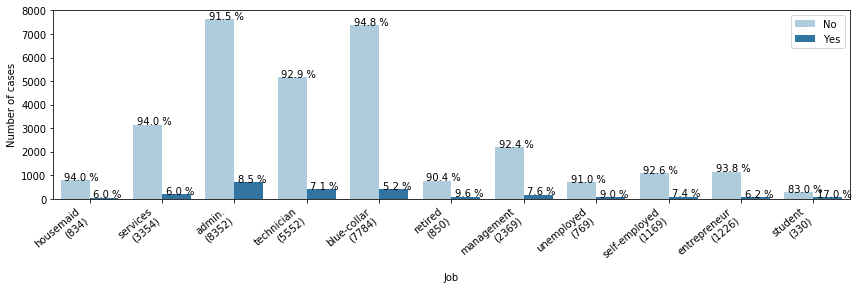

In [51]:
inspect_cat_var(df,'job')

As we can see, there is high subscription rate between students, retired and unemployed. On the opposite side, we have blue-collar workers, services worker and entrepreneurs.

This might help to design new campaings to target groups with high subscription rate (since they seems interested in this type of product) or design new finantial products to target groups with low subscription rate. 

Let's proceed to enconde the variable. 


In [52]:
# Job types
def encode(df,var,prefix):
    type_var_dummies = pd.get_dummies(df[var], prefix = prefix)

    del df[var] # deleting the previous not encoded data
    
    print("Encoded '{}' variable.".format(var))
    return df.merge(type_var_dummies, left_index=True,right_index=True) 


df = encode(df,'job','job') 

Encoded 'job' variable.


#### 'Marital'


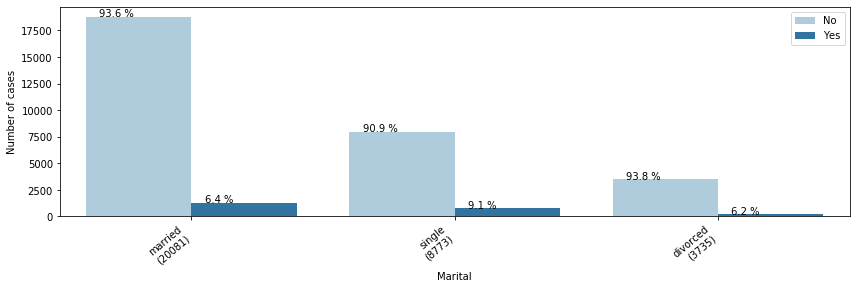

In [53]:
inspect_cat_var(df,'marital')

Interestingly, this type of financial product is more successful between single.


In [54]:
# Encoding
df = encode(df,'marital','mar')  

Encoded 'marital' variable.


#### 'Education'


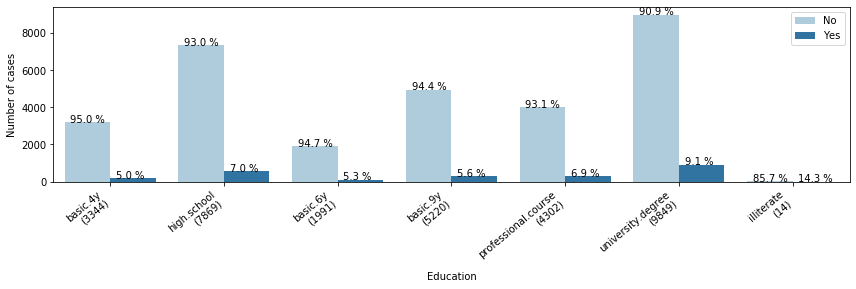

In [55]:
inspect_cat_var(df,'education')

The product is noticeably sucessful among illiterate and university-degree holders. It should be noticed also that for the case of illiterate, there is only 18 samples, which might not be representative. I'm going to delete every row related to that case.


In [56]:
df.drop(axis=0,index = df[df['education']=='illiterate'].index,inplace=True)

In [57]:
# Encoding
df = encode(df,'education','edu') 

Encoded 'education' variable.


#### 'Housing' 


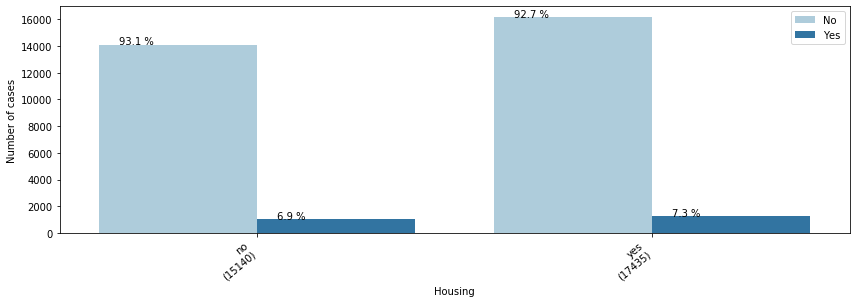

In [58]:
inspect_cat_var(df,'housing')

There is not much difference between having housing loan or not. 

In [59]:
#Encoding
df = encode(df,'housing','hous')

Encoded 'housing' variable.


#### 'Loan'


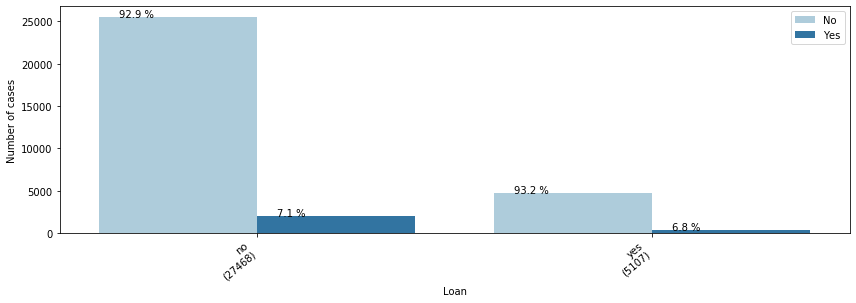

In [60]:
inspect_cat_var(df,'loan')

The customer without personal loans are more prone to subscribe the term deposit. 

In [61]:
#Encoding
df = encode(df,'loan','loan')

Encoded 'loan' variable.


#### 'Contact' 

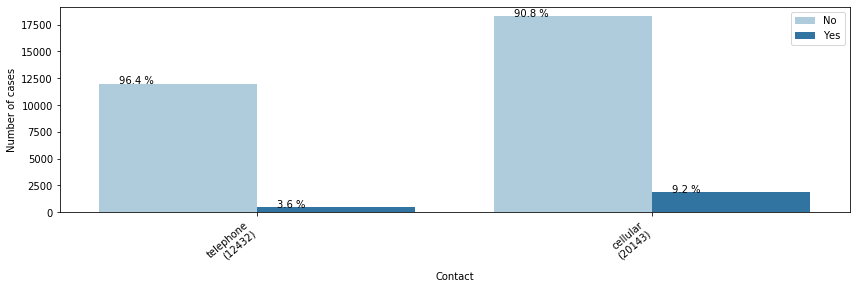

In [62]:
inspect_cat_var(df,'contact')

It seems there is a more subscription rate when the communication is performed over the cellular. Probably this is masking something else, for example higher rate of subscription among young people. We already shown that the people with high education have a high subscription rate. 

In [63]:
df = encode(df,'contact','con')

Encoded 'contact' variable.


#### 'Month' 

Here I'm going to assume that the behaviour of the subscription in each of the months is independent of the previous/later months. If this premise is not fulfilled, we cannot use the OneHotDecoder approach we have been using until now. 



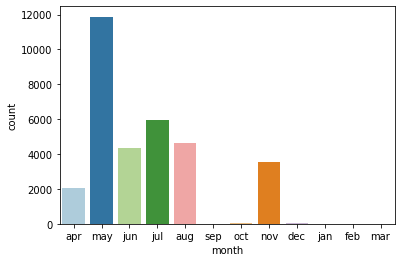

In [64]:
months_ = ['apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar'] # Finantial year
sns.countplot(x='month', data=df, order=months_);

Over the year, it seems there is more subscriptons in the first half of the finantial year. However it seems to me there is not a clear trend accross different months. I think then we can assume without much error that the behaviour of each of the months is different to the previous/later month. 

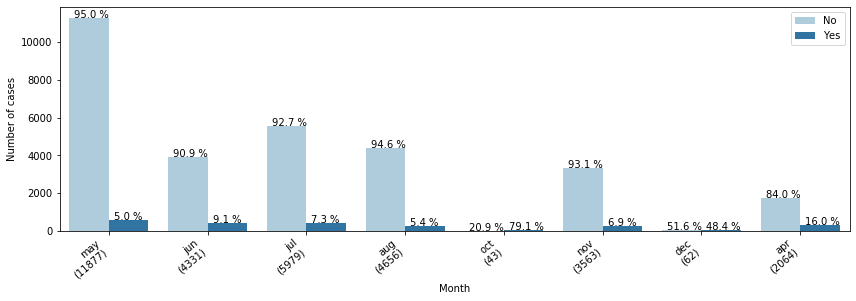

In [65]:
inspect_cat_var(df,'month')

It is quite interesting how the months with lower samples present remarkably high subscription rates.  For example, October, December, March, etc.. On the opposite to May, June, July or August.

This might be due to a wrong sampling because a low number of samples.

Let's proceed to encode the data. This type of data is cyclical, in the sense that 'dec' is as close to 'nov' as it is to 'jan'. Hence we need a different way to encode this variable. 

In [66]:
map_ = {each : ind for ind,each in enumerate(months_)}

df['month_num'] = df.month.map(map_)

df['month_sin'] = np.sin((df.month_num)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month_num)*(2.*np.pi/12))

del df['month_num']
del df['month']

#### 'Day_of_week'

Here we follow the same approached followed with the month variable.

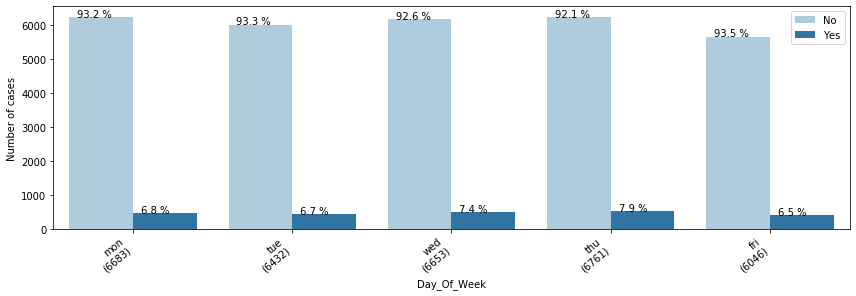

In [67]:
inspect_cat_var(df,'day_of_week')

Here all days have similar percentage of sucess. Hence I don't think this variable is very relevant.  

Let's encode the data.

In [68]:
week_days_ = df['day_of_week'].unique().tolist()
map_ = {each : ind for ind,each in enumerate(week_days_)}

df['week_num'] = df.day_of_week.map(map_)

df['weekday_sin'] = np.sin((df.week_num)*(2.*np.pi/5)) #assuming the week has 5 days, and the weekend has no effect on them. 
df['weekday_cos'] = np.cos((df.week_num)*(2.*np.pi/5))

del df['week_num']
del df['day_of_week']

#### 'poutcome' 

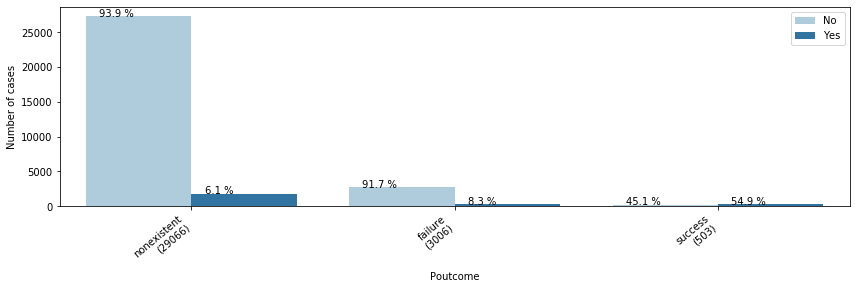

In [69]:
inspect_cat_var(df,'poutcome')

This graph shows that the rate of success is quite high when there has been previous contacts ('poutcome' equal to failure or success). 

Also the rate of success is quite high in clients who already have been contacted successfully (poutcome==success). This might mean that the clients are very positive about the company/bank which makes them subscribe to more of their products. Somehow this can be related to the client loyalty. 

The subscription rate for success is very high compared other cases. I would probably feel tempted to contact more of the current customers since they might be happy to subscribe more term deposits.

Let's encode this variable.

In [70]:
df = encode(df,'poutcome','pout')

Encoded 'poutcome' variable.


### Final Dataset

The encoding of the variables is finished. 

Now all the variables in our dataframe should numerical.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32575 entries, 0 to 40552
Data columns (total 42 columns):
age                        32575 non-null int64
campaign                   32575 non-null int64
previous                   32575 non-null int64
emp.var.rate               32575 non-null float64
cons.price.idx             32575 non-null float64
cons.conf.idx              32575 non-null float64
euribor3m                  32575 non-null float64
nr.employed                32575 non-null float64
subscribed                 32575 non-null int64
job_admin.                 32575 non-null uint8
job_blue-collar            32575 non-null uint8
job_entrepreneur           32575 non-null uint8
job_housemaid              32575 non-null uint8
job_management             32575 non-null uint8
job_retired                32575 non-null uint8
job_self-employed          32575 non-null uint8
job_services               32575 non-null uint8
job_student                32575 non-null uint8
job_technician   

In [72]:
df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job_admin.,...,loan_yes,con_cellular,con_telephone,month_sin,month_cos,weekday_sin,weekday_cos,pout_failure,pout_nonexistent,pout_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0.5,0.866025,0.0,1.0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0.5,0.866025,0.0,1.0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0.5,0.866025,0.0,1.0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,1,0.5,0.866025,0.0,1.0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,1,0.5,0.866025,0.0,1.0,0,1,0


In [73]:
df.sample()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job_admin.,...,loan_yes,con_cellular,con_telephone,month_sin,month_cos,weekday_sin,weekday_cos,pout_failure,pout_nonexistent,pout_success
35235,24,4,0,-1.8,92.893,-46.2,1.25,5099.1,0,0,...,0,1,0,0.5,0.866025,-0.951057,0.309017,0,1,0


In [74]:
df.shape

(32575, 42)

In [75]:
%store df
# %store -r df

Stored 'df' (DataFrame)


### Splitting of data

Previously to use the machine learning algorithms on the data, we need to split the data en three sets:

- **All Training data (80 %)**: Data used to build the model. 
    - **Training (80 %)**: Data used to train the model. 
    - **Tuning (20 %)**: Data used to tune the model. For example, find appropriate hyperparameters. However, some algorithms already implement mechanisms to randomly select this tunning set from the training set. So we might not use it at all.  
    
- **Test data (20 %)**: Data used for validation of the model. Data never seen by the algorithm during traininng. 

In [76]:
from sklearn.model_selection import train_test_split

data_X = df.drop(columns='subscribed'); 
print("Shape of data_X {}".format(data_X.shape))

data_y = df['subscribed'];
print("Shape of data_y {}".format(data_y.shape))


X_training_all, X_test, y_training_all, y_test = train_test_split(data_X,data_y, test_size=0.2)

X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

%store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (32575, 41)
Shape of data_y (32575,)
Stored 'X_training' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_training' (Series)
Stored 'y_test' (Series)
Stored 'X_tuning' (DataFrame)
Stored 'y_tuning' (Series)
Stored 'X_training_all' (DataFrame)
Stored 'y_training_all' (Series)


## Question 1: Develop a mode (*Model-1*) that, given variables 1-20, predicts the probability of a client subscribing for the product

As mentioned before, during the cleaning of the variables we have deleted two variables:

- 'default' for having most of the values either 'No' or 'unknown' hence we just can not extract any conclusion. 

- 'pdays' for having too much missing data (96%)



### Disclaimer.

During working on the present assignment, I found out the next article 'https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c' [[Link]](#TDS_roy_telemarketing).


In the mentioned article, several machine learning algorithms are used on the same dataset as the one proposed for this assignment. The accuracy results are shown in the next figure:


![machine learning results TDS](https://miro.medium.com/max/520/1*ef4jZpU_3fkiLsjKr93YmA.png)

Since this article already approach different algorithms, I considered it might be more interesting to use the best one of this article. 

This article mentioned a scientific paper which analyze an extended version (more variables) of this data set. Four models are tested: logistic regression, decision trees (DTs), neural network (NN) and support vector machine. Using two metrics, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve (ALIFT). The best results are obtained for Neural networks with an AUC value of 0.8.


**Paper:**

[Moro et al., 2014]  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 https://doi.org/10.1016/j.dss.2014.03.001  [[Link]](#MORO201422)

**Notes**

The author of the article uses the AUC parameter to measure performance. However in links [[Link]](#jeniAUCF1) and [[Link]](#liu_1966) it is mentioned that this parameter might not be the best for highly imbalanced dataset.

In our case the training set (*X_training*) has 7132 samples with only 883 positive samples. The ratio negative/positive is 8.077. The balance of a set can be measured more accurately using the *Shannon entropy* [[Link]](#hilman_1966). 

$$\mbox{Balance} = \frac{H}{\log{k}} = \frac{-\sum_{ i = 1}^k \frac{c_i}{n} \log{ \frac{c_i}{n}}.  } {\log{k}}$$

which is equalt to:
- 0 for unbalanced datasets.
- 1 for balanced datasets.

--

**liu_1966**: How to choose between ROC AUC and F1 score?   
https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score   
   
**hilman_1966**: A general measure of data-set imbalance   
https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance   
   
**wikipedia_2020**: Receiver operating characteristic   
https://en.wikipedia.org/wiki/Receiver_operating_characteristic   
   
**wikipedia_2020b**: Bayes' theorem   
https://en.wikipedia.org/wiki/Bayes'_theorem   
   
**wikipedia_2020c**: Pearson correlation coefficient   
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient   
   
    

In [77]:
def balance(seq): # From link [4]
    from collections import Counter
    from numpy import log

    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)

    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

print("The balance (Shannon entropy) of 'y_training' is {}.".format(balance(y_training)))
print("The balance (Shannon entropy) of 'y_tuning' is {}.".format(balance(y_tuning)))
print("The balance (Shannon entropy) of 'y_test' is {}.".format(balance(y_test)))
print('\n')
print("The balance (Shannon entropy) of the complete dataset is {}.".format(balance(data_y)))

The balance (Shannon entropy) of 'y_training' is 0.36996321846351127.
The balance (Shannon entropy) of 'y_tuning' is 0.37668567563172983.
The balance (Shannon entropy) of 'y_test' is 0.3607182810874321.


The balance (Shannon entropy) of the complete dataset is 0.3692086635419015.


As we can see, the dataset is moderately unbalanced. We should probably use F1 score. 

However, in order to compare with the article [[Link]](#TDS_roy_telemarketing) we will use the AUC. 
This scoring parameter measure the area under the ROC curve. This curve is created by plotting the true positive rate against the false positive rate at various threshold settings. 
More information on this parameter in [[Link]](#wikipedia_2020).

In [78]:
# For restoring the data if needed.
%store -r X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

### XGBoost Model

This model is the one which shows the best performance in the cited article. Hence we are going to replicate it and compare it with other model.

In [79]:
from sklearn.metrics import roc_auc_score as measure_roc_auc

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [80]:
x_cfl = XGBClassifier(
#     tree_method='gpu_hist',
    max_bin=16)

# Space search for the parameters. 
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500,1000,2000],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5,1],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.1,0.3,0.5,1]                    #Denotes the fraction of observations to be randomly samples for each tree.
}


#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl=RandomizedSearchCV(x_cfl,
                              param_distributions=prams,
                              verbose=2,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=2 #To speed up calculations
                             )

# random_cfl.fit(X_training_all, y_training_all) #Training

#save the data, since it takes long to run. 
# %store random_cfl 
%store -r random_cfl

pprint(random_cfl.best_params_)
print("The AUC score is {}".format(random_cfl.best_score_))


{'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 1}
The AUC score is 0.7688088144436886


Let's see if the model is overfitting the data by running the model over the test data

In [81]:
# %store -r random_cfl
predict_y = random_cfl.predict_proba(X_test)

accur_test = measure_roc_auc(y_test, predict_y[:, 1])
print("The test AUC for test data is: {}".format(accur_test))

predict_y = random_cfl.predict_proba(X_training_all)
accur_training = measure_roc_auc(y_training_all, predict_y[:, 1])
print("The test AUC for training data is: {}".format(accur_training))

The test AUC for test data is: 0.8055770617564693
The test AUC for training data is: 0.7803329633104759


The AUC values are consistent accross all the subsets which makes me think the model does not overfit the data. 

Let's see what are the most important parameters. 

In [82]:
from xgboost import plot_importance
from xgboost import plot_tree

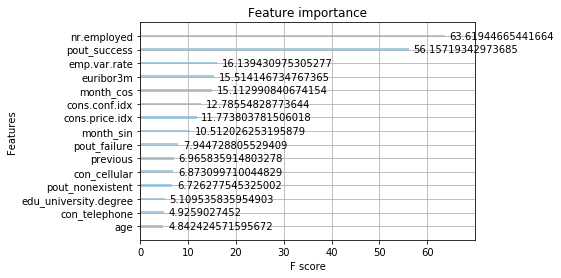

In [83]:
model = random_cfl.best_estimator_
ax = plot_importance(model, importance_type='gain', max_num_features=15)

As we can see in the above figure, the most important variables identified by the XGBoost algorithm are `nr.employed`, `euribor3m` and `pout_success`. 

It should be noticed that the importance is given in terms of F1 score. Althought we have choosen to use AUC score, the results should be similar with both metrics. 

The XGBoost shows around {{round(accur_test,4)}} accuracy. This is already quite high. 

## Question 2: Identify which variable is the most predictive of a client’s subscription

The variables more important for the prediction are those identified in the plot_importance graph.

"Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model." 

<Figure size 1080x720 with 0 Axes>

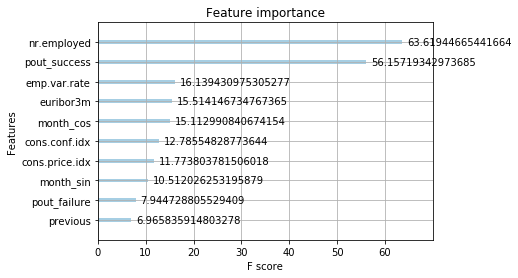

In [84]:
fig = plt.figure(figsize = (15,10))

plot_importance(model, importance_type='gain',max_num_features=10); 
fig.savefig('xgboost.png', dpi=200)
plt.show()

As we can see the most important ones are the `nr.employed`, `pout_success`, `emp.var.rate` and `euribor3m`. 

**Note**

The values of accuracy depend, of course, of the configuration parameter values. In our case, the space search ('prams') has been chosen based on experience, but more optimum values might be available out of the chosen ranges.

## Question 3:  Identify any highly correlated pairs of variables

This has been already answered in two parts, correlation analysis and importance variables.

### Linear correlation.

The **linear** correlationship between the different variables is analysed using the Pearson coefficient. This coefficient is a measure of the linear correlation between two variables X and Y [[Link]](#wikipedia_2020c). 

![Correlation](corr.png)

In [85]:
print("\nMaximum correlated variables with 'subscribed'\n")
print(max_correlated_variables)


Maximum correlated variables with 'subscribed'

emp.var.rate   -0.223976
euribor3m      -0.217577
nr.employed    -0.247554
Name: subscribed, dtype: float64


### Nonlinear correlationship.
The **nonlinear** relationships can be explored by analysing the importance of the variables. This importance has been already obtained when training the XGBoost (or any tree model). 
Variables which has high important in the model will be correlated with the output variable ('y'). The importance reflects complex relationships between variables.

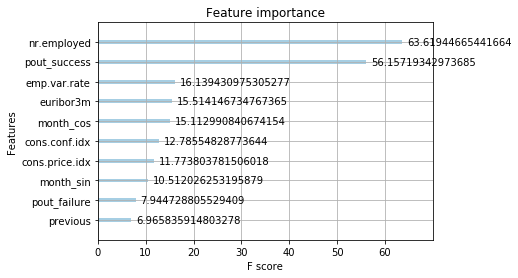

In [86]:
plot_importance(model, importance_type='gain',max_num_features=10);

## Question 4:  Develop a second model (Model-2) that uses only 5 of the provided variables explain your choice

When it comes to choose the variables which can optimise the model (feature selection), there are several approaches. The most common is to select the variables with high correlationship or importance. 

Other option is to run the model incrementally, adding new variables and check the metrics in order to see if the performance improves or not. Unfortunately, this approach is very computer intensive. Given the scope of this assignment, the first approach based on correlationship and importance will be used. 

Given the previous output (correlationship and importance), `nr.employed` should be used. 
`pout_success` represent `poutcome` so it should be also included. 
`emp.var.rate` shows high linear correlationship and high importance, hence it should be included as well. 

There are now three candidates for the two position left. The candidates are `euribor3m`, `cons.conf.idx` and `month`.
All of them in the same range of importance. 

- Including `month` will add two variables which might increase the computation cost but it might probably enrich more the model than a numeric variable. 

- Including `euribor3m` seems like a good idea because it has high importance and high correlationship. 

- `cons.conf.idx` show lower importance than the previous ones, but on the opposite it is an numeric value so the computational cost is lower than a categorical variable (`month`).


Let's have a look at both options.



### Model 2.a. (Month)


In [87]:
var_patter = ['nr.employed','pout_','month', 'emp.var.rate', 'euribor3m']
reg = '|'.join(var_patter)

var_red = df.filter(regex=reg).columns
pprint(var_red.to_list())


['emp.var.rate',
 'euribor3m',
 'nr.employed',
 'month_sin',
 'month_cos',
 'pout_failure',
 'pout_nonexistent',
 'pout_success']


I could just filter the columns on X_\*\*. However I believe redo the test split might be interesting from the point of view of sampling the subsets training, test and tuning. 


In [88]:
data_X = df[var_red]; print("Shape of data_X {}".format(data_X.shape))
data_y = df['subscribed']; print("Shape of data_y {}".format(data_y.shape))


X_training_all, X_test, y_training_all, y_test = train_test_split(data_X,data_y, test_size=0.2)

X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

# %store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (32575, 8)
Shape of data_y (32575,)


In [89]:
x_cfl_red = XGBClassifier(
#     tree_method='gpu_hist', 
    max_bin=16)

# Space search for the parameters. # 
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500,1000,2000],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5,1],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.1,0.3,0.5,1]                    #Denotes the fraction of observations to be randomly samples for each tree.
}

#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl_red=RandomizedSearchCV(x_cfl_red,
                              param_distributions=prams,
                              verbose=2,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=1 #To speed up calculations
                             )

# random_cfl_red.fit(X_training_all, y_training_all) #Training

#save the data, since it takes long to run. 
# %store random_cfl_red 
%store -r random_cfl_red 


pprint(random_cfl_red.best_params_)
print("The AUC score is {}".format(random_cfl_red.best_score_))

print('\n')

predict_y = random_cfl_red.predict_proba(X_test)
accu_test_red = measure_roc_auc(y_test, predict_y[:, 1])
print("The test AUC for test data is: {}".format(accu_test_red))

predict_y = random_cfl_red.predict_proba(X_training_all)
accu_training_red = measure_roc_auc(y_training_all, predict_y[:, 1])
print("The test AUC for tunning data is: {}".format(accu_training_red))

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 1}
The AUC score is 0.7681458878822939


The test AUC for test data is: 0.768906033789447
The test AUC for tunning data is: 0.7695142700102199


As we can see the accuracy has decreased a couple of percentage points to **{{round(accu_test_red,4)}}**. 

### Model 2.b. (cons.conf.idx)

Let's see what would have been with the 'cons.conf.idx'.


In [90]:
var_patter = ['nr.employed','pout_','cons.conf', 'emp.var.rate', 'euribor3m']
reg = '|'.join(var_patter)

var_red = df.filter(regex=reg).columns
pprint(var_red.to_list())


['emp.var.rate',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pout_failure',
 'pout_nonexistent',
 'pout_success']


In [91]:
data_X = df[var_red]
print("Shape of data_X {}".format(data_X.shape))

data_y = df['subscribed']
print("Shape of data_y {}".format(data_y.shape))

X_training_all, X_test, y_training_all, y_test = train_test_split(data_X, data_y, test_size=0.2)
X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

# %store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (32575, 7)
Shape of data_y (32575,)


In [92]:
x_cfl_red_alt = XGBClassifier(
#     tree_method='gpu_hist',
    max_bin=16)

# Space search for the parameters. 
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500,1000,2000],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5,1],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.1,0.3,0.5,1]                    #Denotes the fraction of observations to be randomly samples for each tree.
}
#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl_red_alt =RandomizedSearchCV(x_cfl_red_alt,
                              param_distributions=prams,
                              verbose=1,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=2 #To speed up calculations
                             )

# Uncomment to run the model
random_cfl_red_alt.fit(X_training_all, y_training_all) #Training

#save the data, since it takes long to run. 
%store random_cfl_red_alt
# %store -r random_cfl_red_alt 

pprint(random_cfl_red_alt.best_params_)
print("The AUC score is {}".format(random_cfl_red.best_score_))

print('\n')
predict_y = random_cfl_red_alt.predict_proba(X_test)
accu_test_red_alt = measure_roc_auc(y_test, predict_y[:, 1])
print("The test AUC for test data is: {}".format(accu_test_red_alt))

predict_y = random_cfl_red_alt.predict_proba(X_training_all)
accu_training_red_alt = measure_roc_auc(y_training_all, predict_y[:, 1])
print("The test AUC for tunning data is: {}".format(accu_training_red_alt))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  7.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 27.4min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed: 27.5min finished


Stored 'random_cfl_red_alt' (RandomizedSearchCV)
{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.3}
The AUC score is 0.7681458878822939


The test AUC for test data is: 0.7646097517542587
The test AUC for tunning data is: 0.7686813926061984


The accuracy (AUC) of this model is also around **{{round(accu_test_red_alt,4)}}** but slightly lower than the model with 'month' variable. 

Therefore I would choose as **model 2** the model 2.a. (Month). 

## Question 5: Compare Model-1 and Model-2 

The most frequent way to compare machine learning model is by comparing the accuracy of these methods. 

In terms of accuracy, the reduced model shows similar results to the full model but a bit lower AUCROC. 

In term of time, the computation time has been reduced from 1 hour for the full model to 10 minutes for the reduced model. 


*Don't delete* <!-- Examples of citations: [TDS](#TDS_roy_telemarketing) -->


<!--bibtex

@article{MORO201422,
title = "A data-driven approach to predict the success of bank telemarketing",
journal = "Decision Support Systems",
volume = "62",
pages = "22 - 31",
year = "2014",
issn = "0167-9236",
doi = "https://doi.org/10.1016/j.dss.2014.03.001",
url = "http://www.sciencedirect.com/science/article/pii/S016792361400061X",
author = "Sérgio Moro and Paulo Cortez and Paulo Rita",
keywords = "Bank deposits, Telemarketing, Savings, Classification, Neural networks, Variable selection",
abstract = "We propose a data mining (DM) approach to predict the success of telemarketing calls for selling bank long-term deposits. A Portuguese retail bank was addressed, with data collected from 2008 to 2013, thus including the effects of the recent financial crisis. We analyzed a large set of 150 features related with bank client, product and social-economic attributes. A semi-automatic feature selection was explored in the modeling phase, performed with the data prior to July 2012 and that allowed to select a reduced set of 22 features. We also compared four DM models: logistic regression, decision trees (DTs), neural network (NN) and support vector machine. Using two metrics, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve (ALIFT), the four models were tested on an evaluation set, using the most recent data (after July 2012) and a rolling window scheme. The NN presented the best results (AUC=0.8 and ALIFT=0.7), allowing to reach 79% of the subscribers by selecting the half better classified clients. Also, two knowledge extraction methods, a sensitivity analysis and a DT, were applied to the NN model and revealed several key attributes (e.g., Euribor rate, direction of the call and bank agent experience). Such knowledge extraction confirmed the obtained model as credible and valuable for telemarketing campaign managers."
}

@misc{TDS_roy_telemarketing, 
title={Machine Learning Case Study: A data-driven approach to predict the success of bank telemarketing},
url={https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c}, 
journal={Medium}, 
publisher={Towards Data Science}, 
author={Roy, Sukanta}, 
year={2020}, 
month={Jan}

@INPROCEEDINGS{jeniAUCF1,
author={L. A. {Jeni} and J. F. {Cohn} and F. {De La Torre}},
booktitle={2013 Humaine Association Conference on Affective Computing and Intelligent Interaction},
title={Facing Imbalanced Data--Recommendations for the Use of Performance Metrics},
year={2013},
volume={},
number={},
pages={245-251},
keywords={data handling;face recognition;image registration;learning (artificial intelligence);video coding;video signal processing;imbalanced data;performance metrics;facial action units;AU;situation analysis;automated video annotation;face tracking;face registration;machine learning;FACS coding;rank metrics;Measurement;Gold;Databases;Shape;Three-dimensional displays;Pain;Accuracy;imbalanced data;performance metrics;action unit detection;skew normalization},
doi={10.1109/ACII.2013.47},
ISSN={2156-8103},
month={Sep.},}
}

@misc{liu_1966, title={How to choose between ROC AUC and F1 score?}, url={https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score}, journal={Cross Validated}, author={Liu, George LiuGeorge}, year={1966}, month={Apr}}

@misc{hilman_1966, title={a general measure of data-set imbalance}, url={https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance}, journal={Cross Validated}, author={Hilman, Dror HilmanDror}, year={1966}, month={Sep}}

@misc{wikipedia_2020, title={Receiver operating characteristic}, url={https://en.wikipedia.org/wiki/Receiver_operating_characteristic}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Feb}}

@misc{wikipedia_2020b, title={Bayes' theorem}, url={https://en.wikipedia.org/wiki/Bayes'_theorem}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Jan}}

@misc{wikipedia_2020c, title={Pearson correlation coefficient}, url={https://en.wikipedia.org/wiki/Pearson_correlation_coefficient}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Feb}}

-->
